In [1]:
import os
import os.path
import glob
import cv2
import numpy as np
import imutils
import pickle
from keras.models import load_model
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
cap_im=glob.glob("F:\\captcha recognition\\test\*");
print(len(cap_im))
model=load_model("model.hdf5")
with open("label.pickle", "rb") as f:
    lab=pickle.load(f)
s=""

5


F:\captcha recognition\test\1.png


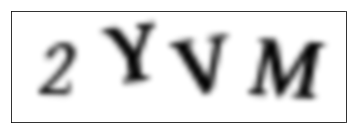

4
2YVM
F:\captcha recognition\test\2.png


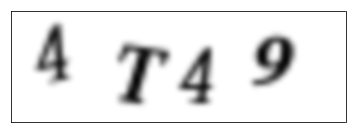

4
4T49
F:\captcha recognition\test\7JWJ.png


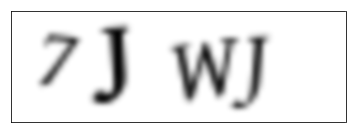

4
7JWJ
F:\captcha recognition\test\9XMY.png


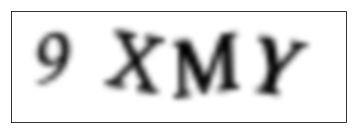

4
9XMY
F:\captcha recognition\test\BLDG.png


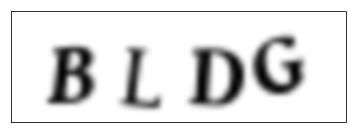

4
BLDG


In [3]:


_im:
    s=""
    print(i)
    image=cv2.imread(i)
    image= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.imshow(image, cmap = 'gray', interpolation = 'bicubic')
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()
    retval, threshold = cv2.threshold(image,0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
    image, contours, hierarchy = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    coord=[]
    for con in contours:
        x,y,w,h=cv2.boundingRect(con)
        if w/h>1.25:
            hw = int(w / 2)
            coord.append((x,y,hw,h))
            coord.append((x+hw,y,hw,h))
        else:
            coord.append((x,y,w,h))
    coord=sorted(coord,key=lambda x:x[0])
    print(len(coord))
    for j in coord:
        x,y,w,h=j
        imag=image[y-2:y+h+2,x-2:x+w+2]
        (h, w) = imag.shape[:2]
        if w > h:
            imag = imutils.resize(imag, width=20)
        else:
            imag = imutils.resize(imag, height=20)

        padW = int((20 - imag.shape[1]) / 2.0)
        padH = int((20 - imag.shape[0]) / 2.0)
        imag = cv2.copyMakeBorder(imag, padH, padH, padW, padW,
        cv2.BORDER_REPLICATE)
        imag = cv2.resize(imag, (20,20))
        imag=np.expand_dims(imag,axis=2)
        imag=np.expand_dims(imag,axis=0)
        pre=model.predict(imag)
        label=lab.inverse_transform(pre)[0]
        s+=label
    print(s)
        